# House Prices - Advanced Regression Techniques
Kaggle dataset : [https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data]

### Sobre os dados:
**File descriptions:**
* **train.csv** - the training set
* **test.csv** - the test set
* **data_description.txt** - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here\
* **sample_submission.csv** - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression as LR
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor as KNN

from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error  as MSE

data=pd.read_csv('train.csv')

In [2]:
#Separando colunas numéricas
df=data.select_dtypes(include=['number']) #1460x38(novo dataframe)
#df.isnull().sum().sort_values(ascending=False)

In [3]:
# Filtrar valores nulos.
#1-Eliminar coluna que tem mais que 10% dos dados nulos.
col_10null = df.columns[(df.isnull().sum()/df.shape[0]) > 0.1]
df = df.drop(col_10null,axis=1)

In [4]:
#1)Eliminar linhas
df0=df.dropna()
#2)substituir por valor aleatório
df1=df

np.random.seed(31)                       #Semente randomica
N_GYB = df1['GarageYrBlt'].isnull().sum() #Total de elementos nulos
N_MVA = df1['MasVnrArea'].isnull().sum()

# GarageYrBlt
sample_GYB = np.random.choice(df1['GarageYrBlt'].dropna(), size=N_GYB, replace=False) 
df1.loc[df1['GarageYrBlt'].isnull(), 'GarageYrBlt'] = sample_GYB 
# MasVnrArea
sample_NVA = np.random.choice(df1['MasVnrArea'].dropna(), size=N_MVA, replace=False) 
df1.loc[df1['MasVnrArea'].isnull(), 'MasVnrArea'] = sample_NVA 

In [5]:
print(df0.shape)
print(df1.shape)

(1371, 37)
(1460, 37)


### Base de treino e teste

In [6]:
# Base de treino e teste
from sklearn.model_selection import train_test_split

x = df0.drop('SalePrice',axis=1)
y = df0.SalePrice

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

### Modelos

1. Regressão linear
2. Árvore de Regressão
3. KNeighborsRegressor

In [7]:
#1 Regressão Linear
mod_LR = LR().fit(x_train, y_train)
y_lr = mod_LR.predict(x_test)

# Arvore de regressão
mod_tree = tree.DecisionTreeRegressor(random_state=42).fit(x_train, y_train)
y_tree   =mod_tree.predict(x_test)

#K-vizinhos mais próximos
mod_knn = KNN(n_neighbors=2).fit(x_train, y_train)
y_knn   = mod_knn.predict(x_test)

### Avaliando Erro dos modelos

In [8]:
print('===== Sumary Tests ====')
print('\nLinear Regression Model')
print(f'MAE: {MAE(y_test,y_lr):3f}')
print(f'MSE: {MSE(y_test,y_lr):3f}')
print(f"Score(R²): {mod_LR.score(x_test, y_test):.3f}")

print('\nDecision Tree Regression Model')
print(f'MAE: {MAE(y_test,y_tree):3f}')
print(f'MSE: {MSE(y_test,y_tree):3f}')
print(f"Score(R²): {mod_tree.score(x_test, y_test):.3f}")

print('\nk-nearest neighbors Model')
print(f'MAE: {MAE(y_test,y_knn):3f}')
print(f'MSE: {MSE(y_test,y_knn):3f}')
print(f"Score(R²): {mod_knn.score(x_test, y_test):.3f}")

===== Sumary Tests ====

Linear Regression Model
MAE: 23248.840844
MSE: 1070440350.379207
Score(R²): 0.829

Decision Tree Regression Model
MAE: 25515.498896
MSE: 1293198604.006623
Score(R²): 0.794

k-nearest neighbors Model
MAE: 35298.941501
MSE: 2767091821.190397
Score(R²): 0.558



| Modelo                        | MAE         | MSE            | Score (R²) |
|-------------------------------|------------|---------------|------------|
| Regressão Linear              | 23321.5797 | 1101025882.46 | 0.826      |
| Árvore de Decisão             | 26211.6414 | 1356612521.78 | 0.786      |
| k-Vizinhos Mais Próximos      | 35227.6487 | 2824442547.90 | 0.554      |


In [10]:
import matplotlib.pyplot as plt

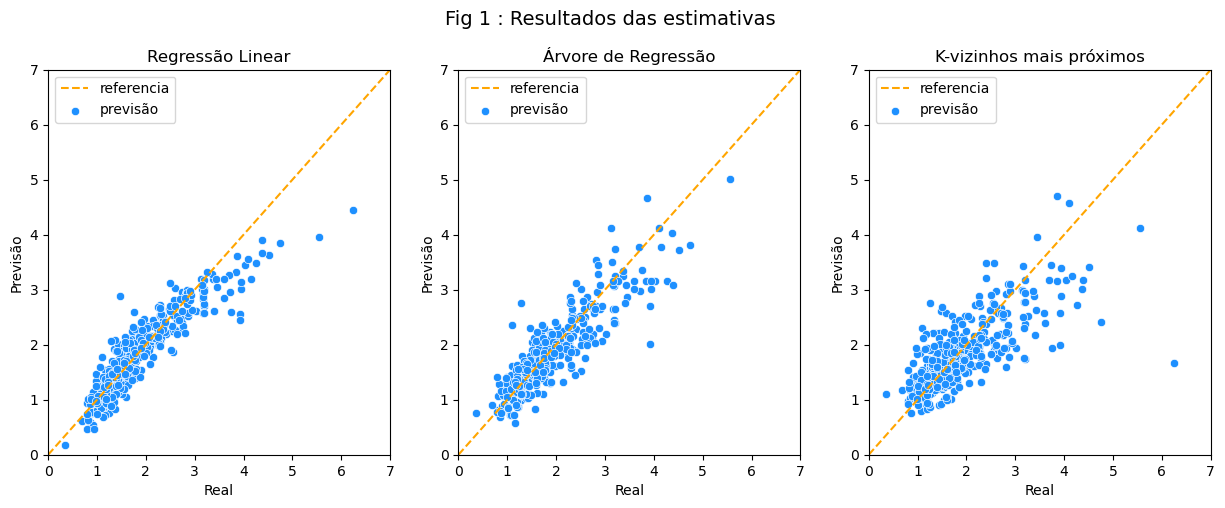

In [11]:
# Plotagem

fig, ax = plt.subplots(ncols=3,figsize=(15,5))
fig.suptitle('Fig 1 : Resultados das estimativas', fontsize=14,y=1);

D=100000

sns.scatterplot(x=y_test/D, y=y_lr/D, ax=ax[0], color='dodgerblue',label='previsão')
ax[0].plot([0,70],[0,70],'--',color='orange',label='referencia')
ax[0].set(xlim=(0, 7),ylim=(0, 7))
ax[0].set_title('Regressão Linear')
ax[0].set_xlabel('Real')
ax[0].set_ylabel('Previsão')
ax[0].legend()

sns.scatterplot(x=y_test/D, y=y_tree/D, ax=ax[1], color='dodgerblue',label='previsão')
ax[1].plot([0,70],[0,70],'--',color='orange',label='referencia')

ax[1].set(xlim=(0, 7),ylim=(0, 7))
ax[1].set_title('Árvore de Regressão')
ax[1].set_xlabel('Real')
ax[1].set_ylabel('Previsão')
ax[1].legend()

sns.scatterplot(x=y_test/D, y=y_knn/D, ax=ax[2], color='dodgerblue',label='previsão')
ax[2].plot([0,70],[0,70],'--',color='orange',label='referencia')
ax[2].set(xlim=(0, 7),ylim=(0, 7))
ax[2].set_title('K-vizinhos mais próximos')
ax[2].set_xlabel('Real')
ax[2].set_ylabel('Previsão')
ax[2].legend()

plt.show()
